# Descriptive Statistics

## General Data Exploration

In [2]:
import numpy as np
import pandas as pd

file_path = "/home/mengling/myproject/hotels/imp_sample.txt"
data = pd.read_table(file_path, sep="\t")

In [57]:
data.describe(include='all')

,date_time,srch_id,visitor_id,visitor_visit_nbr,visitor_loc_country,visitor_loc_region,visitor_loc_city,visitor_wr_member,posa_continent,posa_country,...,prop_super_region,prop_continent,prop_country,prop_market_id,prop_submarket_id,prop_room_capacity,prop_review_score,prop_review_count,prop_hostel_bool,local_date
count,1205488,1.205488e+06,1205488,1205488.000000,1205488,1205253,1205488,570690,506122,1205488,...,1205488,1205488,1205488,1205488.000000,1205488.000000,1205488.000000,1205473.000000,1205473.000000,1205488.000000,1205488
unique,33768,NaN,32333,NaN,162,630,6111,9,4,69,...,4,4,8,NaN,NaN,NaN,NaN,NaN,NaN,28
top,2014-09-18 21:18:20,NaN,0fac9b35-d7b7-4b71-b275-7da40310ea2e,NaN,UNITED STATES OF AMERICA,CA,NEW YORK,Not Signed In|Returning Visitor|Not FC Member,EUROPE,US,...,AMER,NORTHAMERICA,UNITED STATES OF AMERICA,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-03
freq,144,NaN,1214,NaN,667876,167829,29858,268283,297315,668191,...,799139,799139,799139,NaN,NaN,NaN,NaN,NaN,NaN,55371
mean,NaN,7.911320e+06,NaN,12.290286,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,71859.839983,106506.942524,635.147435,4.023492,2170.104724,0.002873,NaN
std,NaN,1.237617e+09,NaN,31.726781,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,39044.980976,7346.743977,1571.564468,0.547181,3081.452795,0.053521,NaN
min,NaN,-2.147404e+09,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,369.000000,60556.000000,-9998.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,-1.058749e+09,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,60039.000000,98238.000000,144.000000,3.800000,309.000000,0.000000,NaN
50%,NaN,1.987147e+07,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,95602.000000,109153.000000,307.000000,4.100000,940.000000,0.000000,NaN
75%,NaN,1.078376e+09,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,95656.000000,110287.000000,788.000000,4.400000,2567.000000,0.000000,NaN


In [3]:
print(data.head(3))

             date_time    srch_id                            visitor_id  \
0  2014-09-02 12:37:39 -548710803  d2bbcf6e-d406-45bb-85f4-9df2a1d3f18f   
1  2014-09-02 12:37:39 -548710803  d2bbcf6e-d406-45bb-85f4-9df2a1d3f18f   
2  2014-09-02 12:37:39 -548710803  d2bbcf6e-d406-45bb-85f4-9df2a1d3f18f   

   visitor_visit_nbr visitor_loc_country visitor_loc_region visitor_loc_city  \
0                 52               JAPAN                 27            OSAKA   
1                 52               JAPAN                 27            OSAKA   
2                 52               JAPAN                 27            OSAKA   

                   visitor_wr_member posa_continent posa_country     ...      \
0  Signed In|WR Member|Not FC Member           ASIA        JAPAN     ...       
1  Signed In|WR Member|Not FC Member           ASIA        JAPAN     ...       
2  Signed In|WR Member|Not FC Member           ASIA        JAPAN     ...       

   prop_super_region  prop_continent  prop_country prop_m

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205488 entries, 0 to 1205487
Data columns (total 51 columns):
date_time                       1205488 non-null object
srch_id                         1205488 non-null int64
visitor_id                      1205488 non-null object
visitor_visit_nbr               1205488 non-null int64
visitor_loc_country             1205488 non-null object
visitor_loc_region              1205253 non-null object
visitor_loc_city                1205488 non-null object
visitor_wr_member               570690 non-null object
posa_continent                  506122 non-null object
posa_country                    1205488 non-null object
srch_hcom_destination_id        1205488 non-null int64
srch_dest_longitude             1205488 non-null float64
srch_dest_latitude              1205488 non-null float64
srch_ci                         1205488 non-null object
srch_co                         1205488 non-null object
srch_ci_day                     1205488 non-null i

### Feature Exploration

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.6)

Let's look at the top 20 countries that people visited the most in percentage:

In [3]:
(data.groupby('prop_country')['prop_country'].count()/ data.shape[0]).sort_values(ascending=False).head(20)


prop_country
UNITED STATES OF AMERICA    0.662917
UNITED KINGDOM              0.128074
JAPAN                       0.082367
FRANCE                      0.077107
SOUTH KOREA                 0.031343
ITALY                       0.018152
SWITZERLAND                 0.000035
MARTINIQUE                  0.000003
Name: prop_country, dtype: float64

Let's look at the histogram of check in day and check out day:

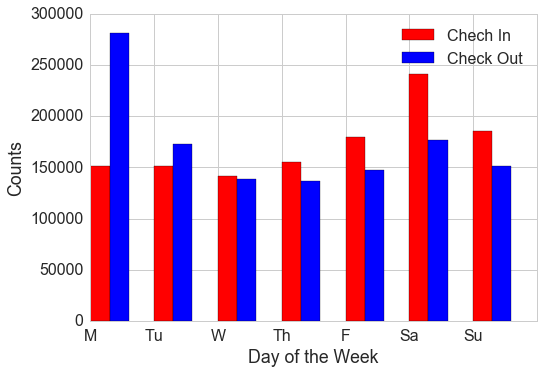

In [9]:
ci_count = data.groupby(['srch_ci_day'])['srch_ci_day'].count()
co_count = data.groupby(['srch_co_day'])['srch_co_day'].count()
fig, ax = plt.subplots()
ind = np.array([1.,2.,3.,4.,5.,6.,7.])
width = 0.3
rects1 = ax.bar(ind, ci_count, width, color='r')
rects2 = ax.bar(ind + width, co_count, width, color='b')
ax.legend((rects1[0], rects2[0]), ('Chech In', 'Check Out'))
plt.xlabel('Day of the Week')
plt.ylabel('Counts')
ax.set_xticklabels(["M","Tu","W","Th","F","Sa","Su"])

## Hotel Position Analysis

### Explore the Position Column

The following plot shows the histogram of the position column.
* The histogram has 2 sharp drops: One is around position=12 and the other one is around position=48.

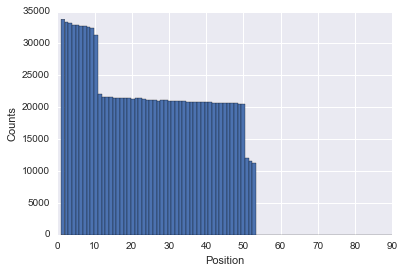

In [68]:
data['position'].hist(bins=90)
plt.xlabel('Position')
plt.ylabel('Counts')

Let us split this distribution based on whether the property was booked or not. Here we looked at how the prop_review_score, prop_review_count and the position are related to booking_bool. We can also see the relationship among the prop_review_score, prop_review_count and the position. 
We notice here:
* The position strongly affects if a property will be booked.
* There is no significant difference between the prop_review_score and prop_review_count between booking_bool=1 and 0.
* People are likely to book a property with more reviews.

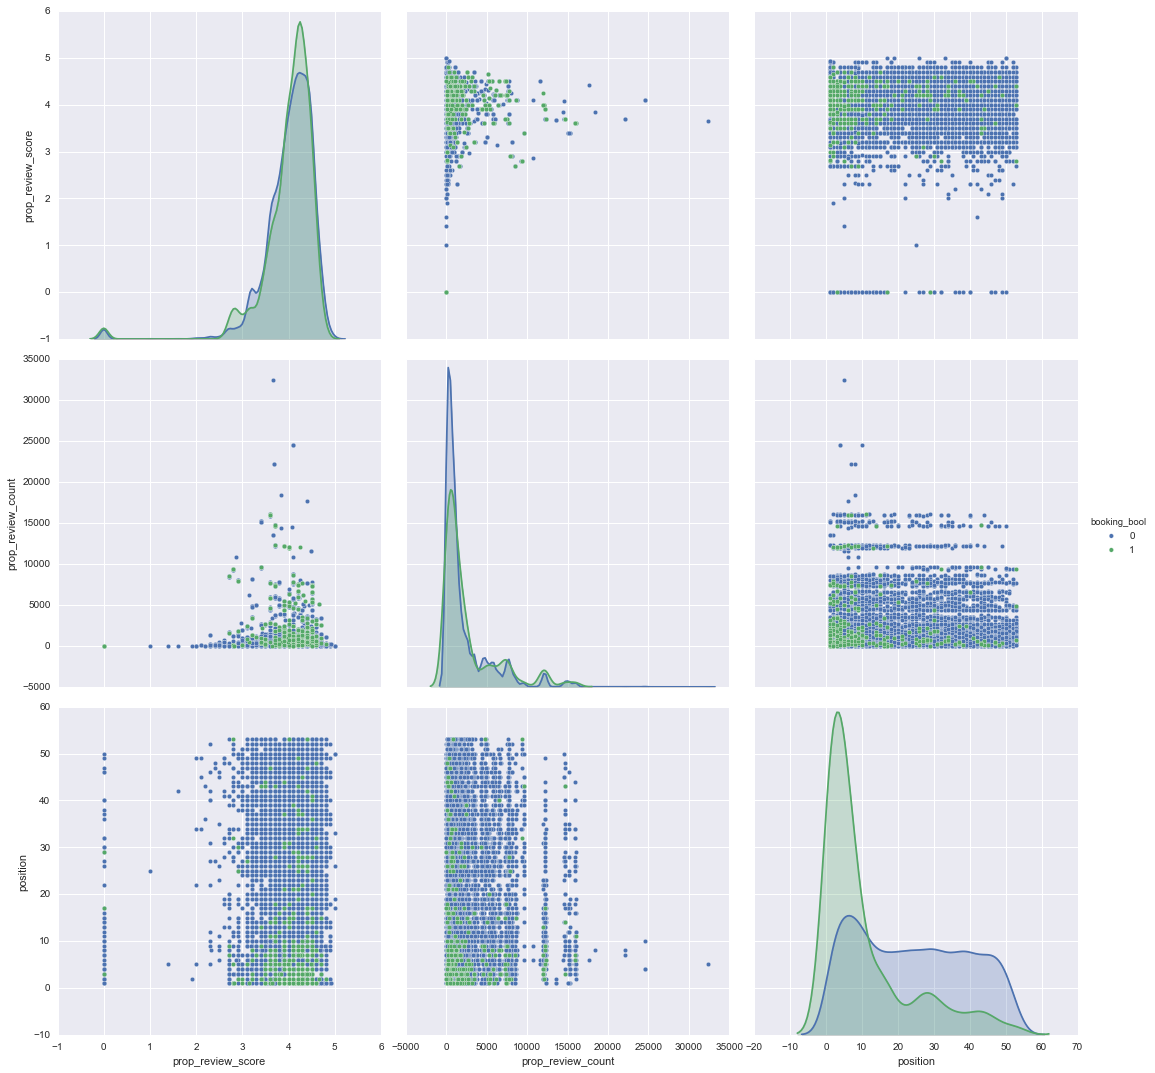

In [71]:
sns.pairplot(data=data.sample(10000), vars=['prop_review_score','prop_review_count','position'], hue='booking_bool', \
             diag_kind='kde', size=5, diag_kws=dict(shade=True))

We can also look at the distribution of the position with respect to the countries where the properties locate. According to the distributions, I believe we can draw conclusions that for a given search, 

* There are two group of distributions: MARTINIQUE and SWITZERLAND belong to one, the rest belong to another.
* It is possible that there are more property options for a customer in Martinique and Switzerland. We need to further split the data for more information.

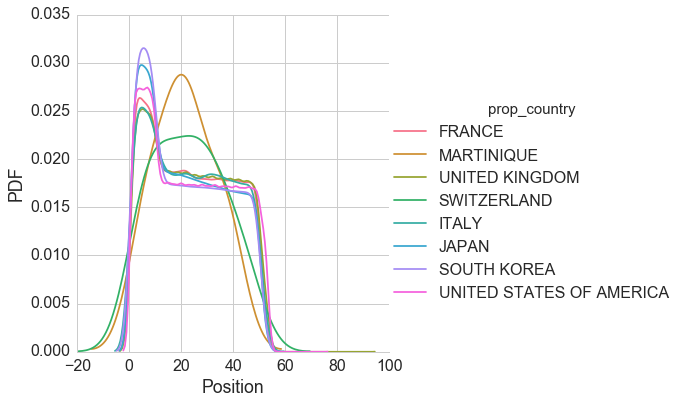

In [7]:
sns.FacetGrid(data, hue="prop_country", size=6) \
   .map(sns.kdeplot, "position") \
   .add_legend() \
   .set_axis_labels("Position","PDF")


Let us zoom in and take look at 3 countries: US, SWITZERLAND AND FRANCE. If we split the data based on booking_bool, we can see that 
* this tells us the distribution difference between the two groups are due to the lack of booking. 


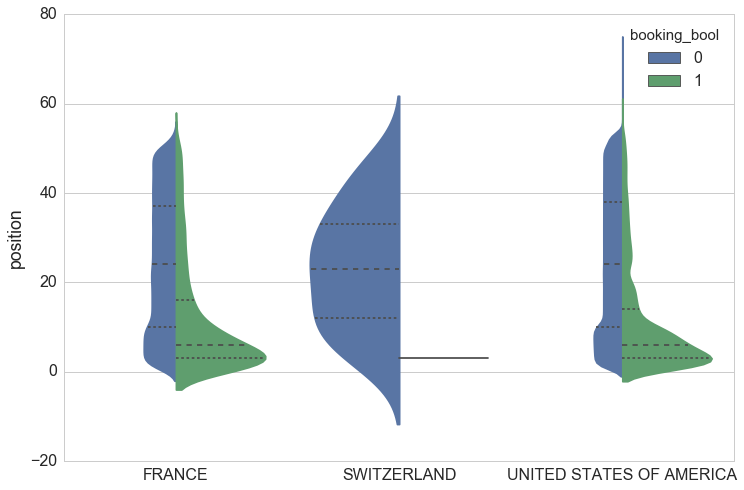

In [9]:
data_country = data.loc[data['prop_country'].isin(['UNITED STATES OF AMERICA', 'SWITZERLAND','FRANCE'])]
plt.figure(figsize=[12,8])
sns.violinplot(x='prop_country', y='position', hue='booking_bool', axis=1, data=data_country, split=True, inner="quart")
plt.xlabel("")

### Position vs Booking

From the previous plot, we can see that  
* There is a strong correlation between the position and the percentage the search was booked. 

This relationship is easy to understand, but as we can see, the relationship is not linear. This can be used as one of the factors to estimate the booking rate.

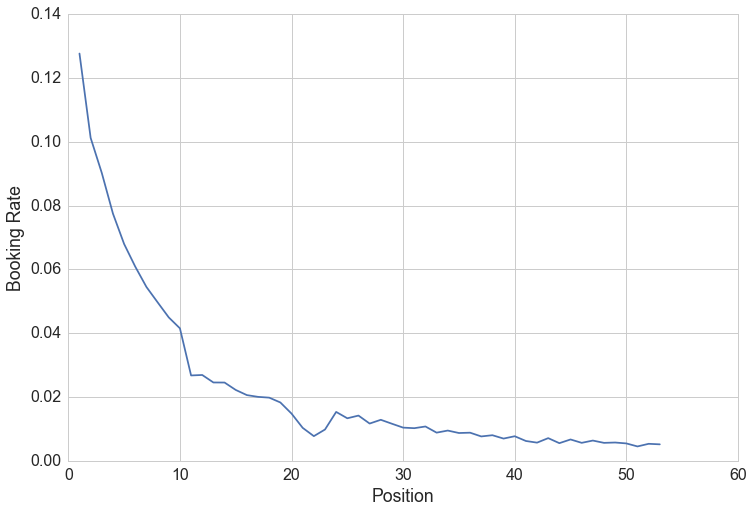

In [86]:
position_book = data.groupby(['position'])['booking_bool'].agg([np.count_nonzero,np.mean, np.std])
                                                   
position_book1 = position_book[position_book['count_nonzero'] > 1]
plt.figure(figsize=[12,8]) 
plt.plot(position_book1.index, position_book1['mean'])
plt.xlabel('Position')
plt.ylabel('Booking Rate')

### Position vs Price and Discount

Next, we will look at how the position and discount rate are related:
* The discount ratio between booked and non-booked are noticable even the data is relatively noisy.
* By visualizing the position and discount rate, I am not able to draw any conclusion that there is a relationship.

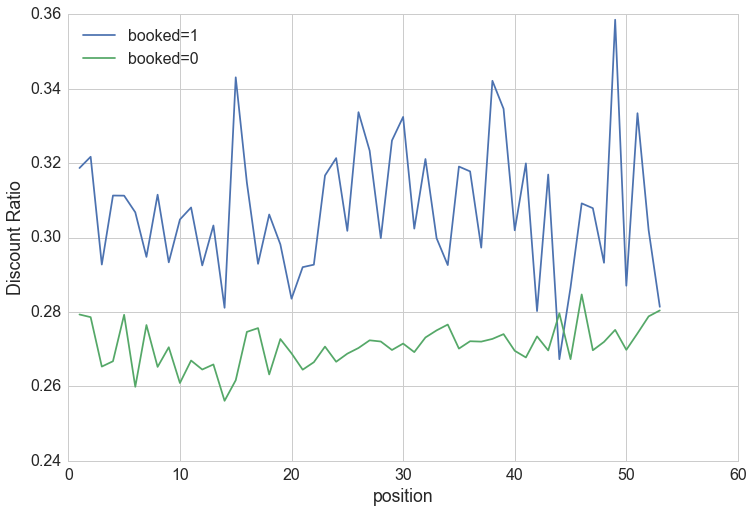

In [16]:
data['discount_ratio'] = (data['price_without_discount_usd'] - 
                          data['price_with_discount_usd']) / data['price_without_discount_usd']

data_book1 = data[data['booking_bool'] == 1]
data_book0 = data[data['booking_bool'] == 0].sample(100000)
position_disc = data.groupby(['position'])['discount_ratio'].agg([np.count_nonzero,np.mean, np.std])
position_disc = position_disc[position_disc['count_nonzero'] > 1]

position_disc1 = data_book1.groupby(['position'])['discount_ratio'].agg([np.count_nonzero,np.mean, np.std])
position_disc1 = position_disc1[position_disc1['count_nonzero'] > 10]

position_disc0 = data_book0.groupby(['position'])['discount_ratio'].agg([np.count_nonzero,np.mean, np.std])
position_disc0 = position_disc0[position_disc0['count_nonzero'] > 10]

plt.figure(figsize=[12,8]) 
#plt.plot(position_disc.index, position_disc['mean'])
plt.plot(position_disc1.index, position_disc1['mean'])
plt.plot(position_disc0.index, position_disc0['mean'])
plt.legend(['booked=1','booked=0'], loc='upper left')
plt.xlabel('position')
plt.ylabel('Discount Ratio')


Similar trend was observed if we look at click_bool:

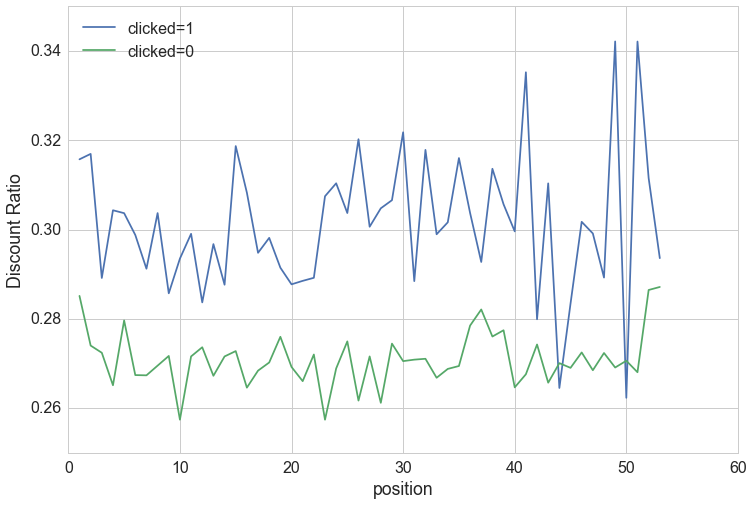

In [28]:
data['discount_ratio'] = (data['price_without_discount_usd'] - 
                          data['price_with_discount_usd']) / data['price_without_discount_usd']

data_click1 = data[data['click_bool'] == 1]
data_click0 = data[data['click_bool'] == 0].sample(100000)

position_disc1 = data_click1.groupby(['position'])['discount_ratio'].agg([np.count_nonzero,np.mean, np.std])
position_disc1 = position_disc1[position_disc1['count_nonzero'] > 10]

position_disc0 = data_click0.groupby(['position'])['discount_ratio'].agg([np.count_nonzero,np.mean, np.std])
position_disc0 = position_disc0[position_disc0['count_nonzero'] > 10]

plt.figure(figsize=[12,8]) 
#plt.plot(position_disc.index, position_disc['mean'])
plt.plot(position_disc1.index, position_disc1['mean'])
plt.plot(position_disc0.index, position_disc0['mean'])
plt.legend(['clicked=1','clicked=0'], loc='upper left')
plt.xlabel('position')
plt.ylabel('Discount Ratio')

However, we do not see any significant difference when we look at the price with discount. There are two huge spikes at around position=20 and 32:

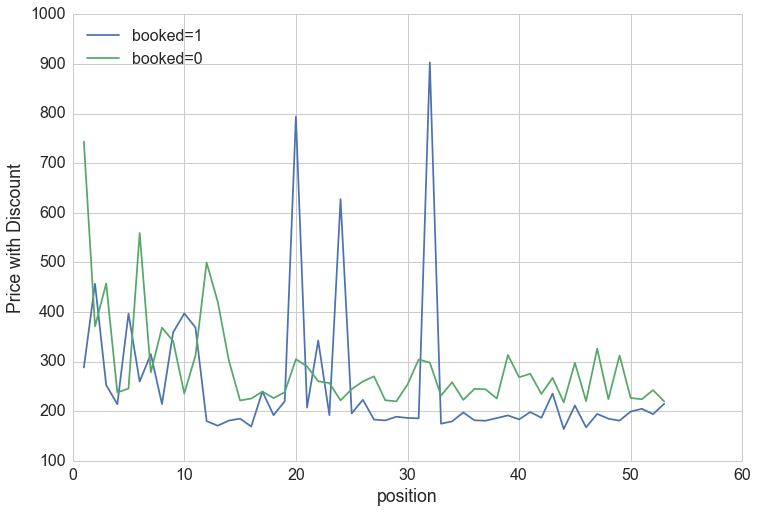

In [8]:
data_book1 = data[data['booking_bool'] == 1]
data_book0 = data[data['booking_bool'] == 0].sample(100000)

position_price1 = data_book1.groupby(['position'])['price_with_discount_usd'].agg([np.count_nonzero,np.mean, np.std])
position_price1 = position_price1[position_price1['count_nonzero'] > 10]

position_price0 = data_book0.groupby(['position'])['price_with_discount_usd'].agg([np.count_nonzero,np.mean, np.std])
position_price0 = position_price0[position_price0['count_nonzero'] > 10]

plt.figure(figsize=[12,8]) 
#plt.plot(position_disc.index, position_disc['mean'])
plt.plot(position_price1.index, position_price1['mean'])
plt.plot(position_price0.index, position_price0['mean'])
plt.legend(['booked=1','booked=0'], loc='upper left')
plt.xlabel('position')
plt.ylabel('Price with Discount')


### Position vs Star Rating

From the Violin plot split based on star_ratings, we can see that
* The trend is similar among different star ratings: The mode for the booked ones are much lower (low position) than the unbooked ones.
* The properties with star rating 3.5,4.0 and 5.0 are likely to have very high positions.
* I believe the difference between the booked=1 and booked=0 results in the bi-modal distribution if we do not split them.

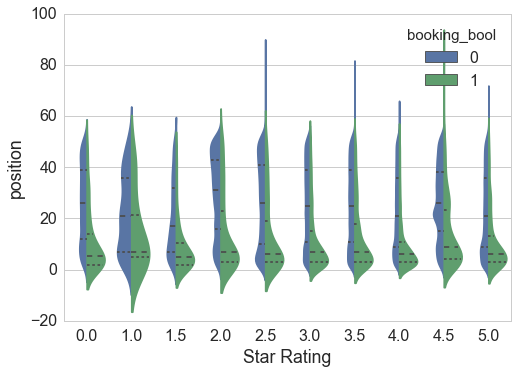

In [98]:
sns.violinplot(x='prop_starrating', y='position', hue='booking_bool', axis=1, \
               data=data.sample(300000), split=True, inner="quart")
plt.xlabel("Star Rating")



### Position vs Number of Reviews vs Review Score

Here we will take a look at how the review score and review counts (in the unit of 1000) are related to the position. 

* The more reviews a property has, the more likely it will be on the lower position on the website. This is not a surprise since they are popular. 
* There is a dip around position ~ 22. I am not sure what causes this but I may guess this is due to the design of the webpage. On the other hand, the ratings are not a strong predictor of the position.

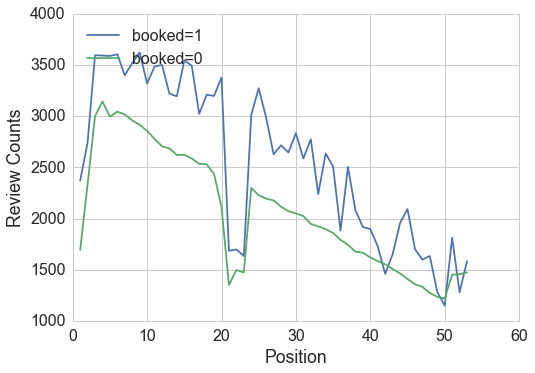

In [107]:
data_book1 = data[data['booking_bool'] == 1]
data_book0 = data[data['booking_bool'] == 0]

count_position_1 = data_book1.groupby(['position'])['prop_review_count'].agg([np.count_nonzero,np.mean, np.std])
count_position_1 = count_position_1[(count_position_1['count_nonzero'] > 1)]
count_position_0 = data_book0.groupby(['position'])['prop_review_count'].agg([np.count_nonzero,np.mean, np.std])
count_position_0 = count_position_0[(count_position_0['count_nonzero'] > 1)]

plt.plot(count_position_1.index,count_position_1['mean'])
plt.plot(count_position_0.index,count_position_0['mean'])
plt.legend(['booked=1','booked=0'], loc='upper left')
plt.xlabel('Position')
plt.ylabel('Review Counts')

Here is the same plot for the review score. 
* We do not see any difference between the booked=1 and booked=0 as a function of the position. 
* We do see a small dip at around position = 3.

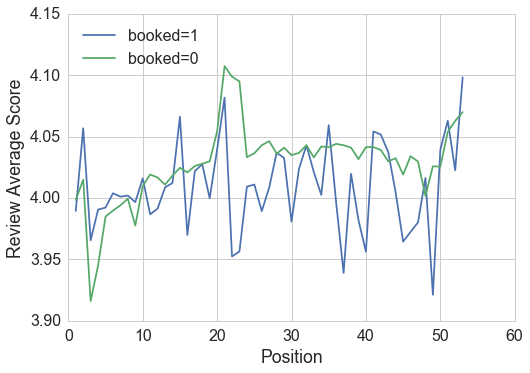

In [7]:
data_book1 = data[data['booking_bool'] == 1]
data_book0 = data[data['booking_bool'] == 0]

score_position_1 = data_book1.groupby(['position'])['prop_review_score'].agg([np.count_nonzero,np.mean, np.std])
score_position_1 = score_position_1[(score_position_1['count_nonzero'] > 3)]
score_position_0 = data_book0.groupby(['position'])['prop_review_score'].agg([np.count_nonzero,np.mean, np.std])
score_position_0 = score_position_0[(score_position_0['count_nonzero'] > 3)]

plt.plot(score_position_1.index,score_position_1['mean'])
plt.plot(score_position_0.index,score_position_0['mean'])
plt.legend(['booked=1','booked=0'], loc='upper left')
plt.xlabel('Position')
plt.ylabel('Review Average Score')

## Summary
* The histogram of the position has 2 sharp drops: One is around position=12 and the other one is around position=48.
* The position strongly affects if a property will be booked.
* There is no significant difference between the prop_review_score and prop_review_count between booking_bool=1 and 0.
* People are likely to book a property with more reviews.
* There are two group of distributions: MARTINIQUE and SWITZERLAND belong to one, the rest belong to another. By splitting the booking_bool= 0 and 1, we found that this is due to the lack of data for booked record in the two countries.
* The discount ratio between booked and non-booked are noticable even the data is relatively noisy.
* By visualizing the position and discount rate, I am not able to draw any conclusion that there is a relationship.
* If we look at the relation between the star rating and position, we see a similar among different star ratings: The mode for the booked ones are much lower (low position) than the unbooked ones. I believe the difference between the booked=1 and booked=0 results in the bi-modal distribution if we do not split them.
* The properties with star rating 3.5,4.0 and 5.0 are likely to have very high positions.
* The more reviews a property has, the more likely it will be on the lower position on the website. This is not a surprise since they are popular. 
* There is a dip around position ~ 22. I am not sure what causes this but I may guess this is due to the design of the webpage. On the other hand, the ratings are not a strong predictor of the position.
* We do not see any difference between the booked=1 and booked=0 as a function of the position. 